<a href="https://colab.research.google.com/github/stepanmouratoglou-a11y/SVM-rbf-kernel/blob/main/German-Credit-Risk-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [43]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
dataset=pd.read_csv(url,sep='\s+',header=None)
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1088083508.py:2: SyntaxWarning: invalid escape sequence '\s'
  dataset=pd.read_csv(url,sep='\s+',header=None)


In [44]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


# Search for missing values

In [58]:
indep_cols=dataset.iloc[:,:-1]
for cols in indep_cols:
  missing_values=dataset[cols].isnull().sum()
  if missing_values>0:
    print(cols + "at index ",dataset.columns.get_loc(cols))
if missing_values==0:
  print('Clear!')

Clear!


# Train the model

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Applying Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [48]:
print(X_train)

[[-1.27298066  3.29708155  0.42039443 ... -0.14734777 -0.48038446
   0.76430257]
 [ 0.31700299 -0.00805096  1.33678555 ... -0.14734777 -0.48038446
   0.76430257]
 [ 1.11199481 -1.27925578 -0.49599669 ... -0.14734777 -0.48038446
   0.76430257]
 ...
 [ 1.11199481  0.24619     1.33678555 ... -0.14734777 -0.48038446
   0.76430257]
 [-0.47798883 -0.77077385 -0.49599669 ... -0.14734777 -0.48038446
   0.76430257]
 [ 1.11199481 -1.27925578  0.42039443 ... -0.14734777 -0.48038446
   0.76430257]]


In [49]:
print(X_test)

[[-1.27298066 -0.26229193 -0.49599669 ... -0.14734777 -0.48038446
   0.76430257]
 [-1.27298066 -0.26229193 -0.49599669 ... -0.14734777  2.081666
  -1.30838236]
 [-1.27298066  0.24619    -1.41238781 ... -0.14734777 -0.48038446
   0.76430257]
 ...
 [-1.27298066  0.24619    -0.49599669 ... -0.14734777  2.081666
  -1.30838236]
 [-1.27298066  0.24619    -1.41238781 ... -0.14734777 -0.48038446
   0.76430257]
 [ 1.11199481  2.78859963 -2.32877893 ... -0.14734777  2.081666
  -1.30838236]]


# Searching for the best possible grid parameters

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid={
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf']
}

grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5)

grid.fit(X_train,y_train)

print(grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

# Apply our parameters to the SupportVectorClassifier

In [51]:
classifier=SVC(C=100,kernel='rbf',gamma=0.001)
classifier.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

# Make the predictions

In [52]:
y_pred=classifier.predict(X_test)

In [53]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 2]
 [2 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 2]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [2 2]

# Checking the accuracy score and confusion matrix

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.78
[[126  15]
 [ 29  30]]


# Visualising our results

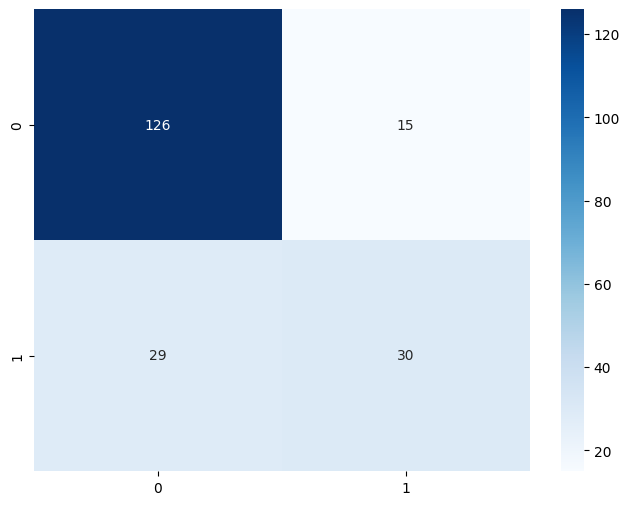

In [55]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()


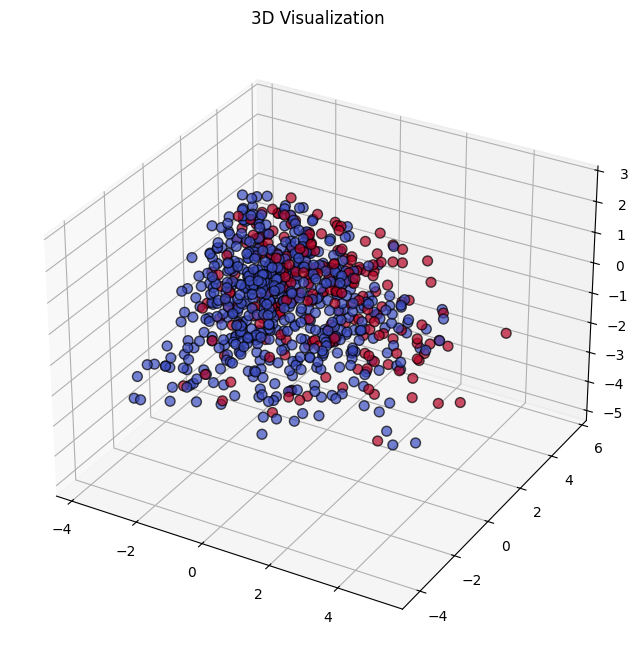

In [56]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_3d = PCA(n_components=3)
X_train_pca3 = pca_3d.fit_transform(X_train)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca3[:, 0],
                     X_train_pca3[:, 1],
                     X_train_pca3[:, 2],
                     c=y_train,
                     cmap='coolwarm',
                     s=50,
                     edgecolors='k',
                     alpha=0.7)
ax.set_title('3D Visualization')
plt.show()

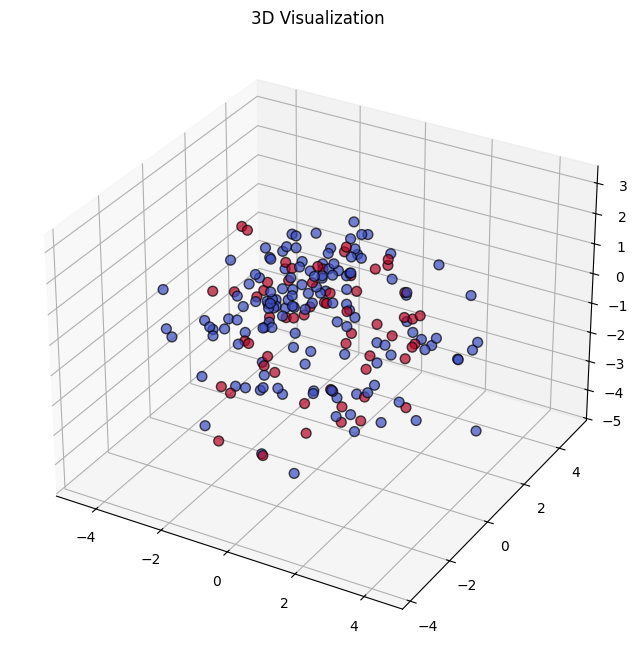

In [57]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_3d_2 = PCA(n_components=3)
X_test_pca3 = pca_3d_2.fit_transform(X_test)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_test_pca3[:, 0],
                     X_test_pca3[:, 1],
                     X_test_pca3[:, 2],
                     c=y_test,
                     cmap='coolwarm',
                     s=50,
                     edgecolors='k',
                     alpha=0.7)
ax.set_title('3D Visualization')

plt.show()